# Insurance Claims- Fraud Detection Project


Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Dataset

In [2]:
df=pd.read_csv("C:/Users/Lenovo/Downloads/insurancefraud.csv")
df
pd.pandas.set_option('display.max_columns',41)

We have to use pd.pandas.set_option('disply.max_columns',41) to see total columns of the dataset 

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
#checking dimension
df.shape

(1000, 40)

About Dataset

In [5]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking Null Values

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

We drop _c39 column because it's all value is null

In [8]:
df=df.drop('_c39',axis=1)

In [9]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

We haveto drop policy_no as it is not so much required

In [10]:
df=df.drop('policy_number',axis=1)

We have to divide dataset in catagorical and numeric column for better understanding of Dataset

In [11]:
df_cat=[i for i in df.columns if df[i].dtypes==object]

In [12]:
df_num=[i for i in df.columns if df[i].dtypes!=object]

In [13]:
len(df_cat)

21

In [14]:
len(df_num)

17

In [15]:
df[df_cat].head()

,policy_bind_date,policy_state,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,17-10-2014,OH,250/500,MALE,MD,craft-repair,sleeping,husband,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,YES,YES,Saab,92x,Y
1,27-06-2006,IN,250/500,MALE,MD,machine-op-inspct,reading,other-relative,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,?,?,Mercedes,E400,Y
2,06-09-2000,OH,100/300,FEMALE,PhD,sales,board-games,own-child,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,NO,NO,Dodge,RAM,N
3,25-05-1990,IL,250/500,FEMALE,PhD,armed-forces,board-games,unmarried,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,?,NO,Chevrolet,Tahoe,Y
4,06-06-2014,IL,500/1000,MALE,Associate,sales,board-games,unmarried,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,NO,NO,Accura,RSX,N


Checking unique values of catagorical columns

In [16]:
df[df_cat]['policy_state'].unique()

array(['OH', 'IN', 'IL'], dtype=object)

In [17]:
df[df_cat]['policy_csl'].unique()

array(['250/500', '100/300', '500/1000'], dtype=object)

In [18]:
df[df_cat]['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [19]:
df[df_cat]['insured_education_level'].unique()

array(['MD', 'PhD', 'Associate', 'Masters', 'High School', 'College',
       'JD'], dtype=object)

In [20]:
df[df_cat]['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [21]:
df[df_cat]['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [22]:
df[df_cat]['insured_relationship'].unique()

array(['husband', 'other-relative', 'own-child', 'unmarried', 'wife',
       'not-in-family'], dtype=object)

In [23]:
df[df_cat]['incident_type'].unique()

array(['Single Vehicle Collision', 'Vehicle Theft',
       'Multi-vehicle Collision', 'Parked Car'], dtype=object)

In [24]:
df[df_cat]['incident_severity'].unique()

array(['Major Damage', 'Minor Damage', 'Total Loss', 'Trivial Damage'],
      dtype=object)

In [25]:
df[df_cat]['authorities_contacted'].unique()

array(['Police', 'None', 'Fire', 'Other', 'Ambulance'], dtype=object)

In [26]:
df[df_cat]['incident_state'].unique()

array(['SC', 'VA', 'NY', 'OH', 'WV', 'NC', 'PA'], dtype=object)

In [27]:
df[df_cat]['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [28]:
df[df_cat]['incident_location'].unique()

array(['9935 4th Drive', '6608 MLK Hwy', '7121 Francis Lane',
       '6956 Maple Drive', '3041 3rd Ave', '8973 Washington St',
       '5846 Weaver Drive', '3525 3rd Hwy', '4872 Rock Ridge',
       '3066 Francis Ave', '1558 1st Ridge', '5971 5th Hwy',
       '6655 5th Drive', '6582 Elm Lane', '6851 3rd Drive',
       '9573 Weaver Ave', '5074 3rd St', '4546 Tree St',
       '3842 Solo Ridge', '8101 3rd Ridge', '5380 Pine St',
       '8957 Weaver Drive', '2526 Embaracadero Ave', '5667 4th Drive',
       '2502 Apache Hwy', '3418 Texas Lane', '2533 Elm St',
       '3790 Andromedia Hwy', '3220 Rock Drive', '2100 Francis Drive',
       '4687 5th Drive', '9038 2nd Lane', '6092 5th Ave',
       '8353 Britain Ridge', '3540 Maple St', '3104 Sky Drive',
       '4981 Weaver St', '6676 Tree Lane', '3930 Embaracadero St',
       '3422 Flute St', '4862 Lincoln Hwy', '5719 2nd Lane',
       '3221 Solo Ridge', '6660 MLK Drive', '1699 Oak Drive',
       '4234 Cherokee Lane', '7476 4th St', '8907 Tree Ave

In [29]:
df[df_cat]['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [30]:
df[df_cat]['auto_make'].unique()

array(['Saab', 'Mercedes', 'Dodge', 'Chevrolet', 'Accura', 'Nissan',
       'Audi', 'Toyota', 'Ford', 'Suburu', 'BMW', 'Jeep', 'Honda',
       'Volkswagen'], dtype=object)

In [31]:
df[df_cat]['auto_model'].unique()

array(['92x', 'E400', 'RAM', 'Tahoe', 'RSX', '95', 'Pathfinder', 'A5',
       'Camry', 'F150', 'A3', 'Highlander', 'Neon', 'MDX', 'Maxima',
       'Legacy', 'TL', 'Impreza', 'Forrestor', 'Escape', 'Corolla',
       '3 Series', 'C300', 'Wrangler', 'M5', 'X5', 'Civic', 'Passat',
       'Silverado', 'CRV', '93', 'Accord', 'X6', 'Malibu', 'Fusion',
       'Jetta', 'ML350', 'Ultima', 'Grand Cherokee'], dtype=object)

In [32]:
df[df_cat]['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [33]:
df[df_cat].columns

Index(['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported'],
      dtype='object')

In [34]:
df_cat=df[['policy_state', 'policy_csl', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'police_report_available', 'auto_make', 'auto_model',
       'fraud_reported']]

Visualization of unique values and its count in catagorical column

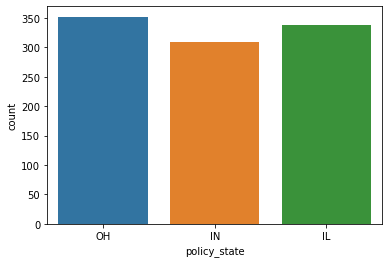

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


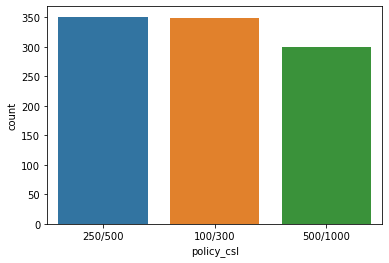

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


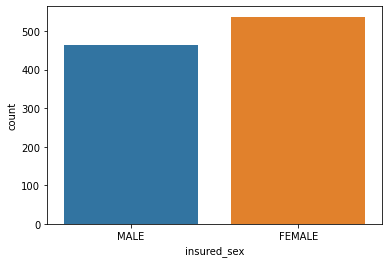

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


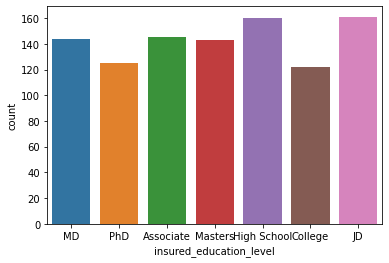

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


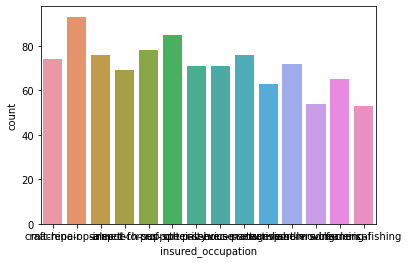

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


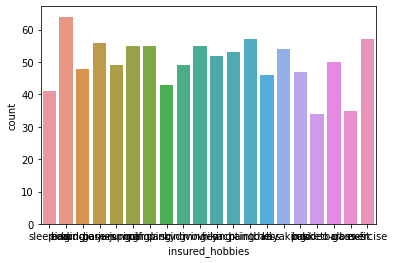

reading           64
paintball         57
exercise          57
bungie-jumping    56
camping           55
golf              55
movies            55
kayaking          54
yachting          53
hiking            52
video-games       50
base-jumping      49
skydiving         49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


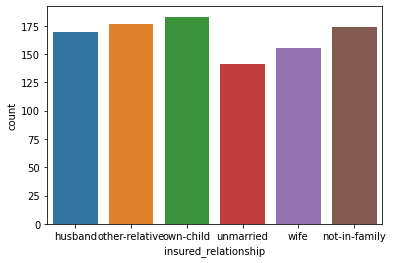

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


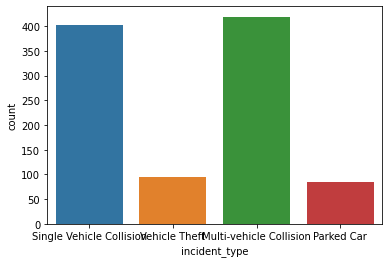

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


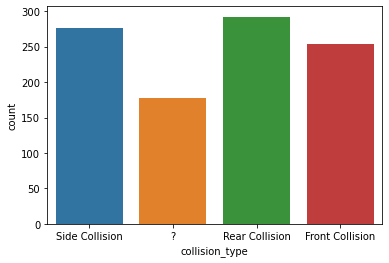

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


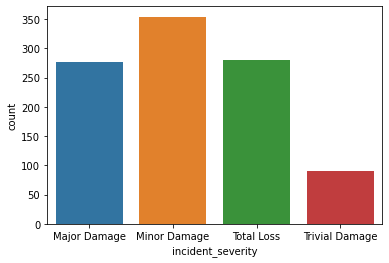

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


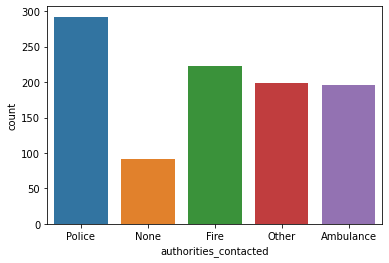

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


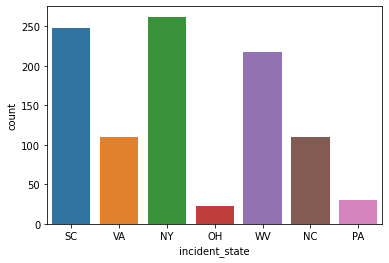

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


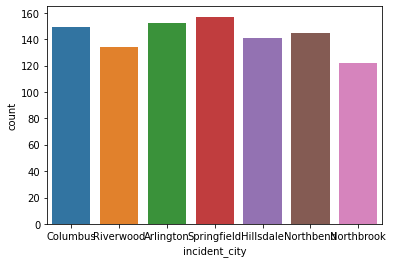

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


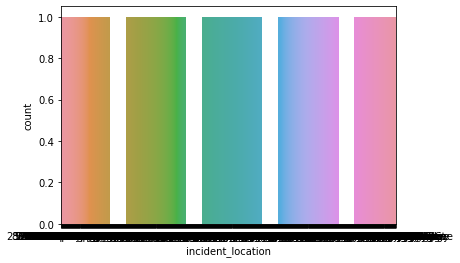

4983 MLK Ridge      1
7780 Flute Lane     1
8049 4th St         1
3184 Oak Ave        1
6838 Flute Lane     1
                   ..
1365 Francis Ave    1
6605 Tree Ave       1
6179 3rd Ridge      1
9138 3rd St         1
8078 Britain Hwy    1
Name: incident_location, Length: 1000, dtype: int64


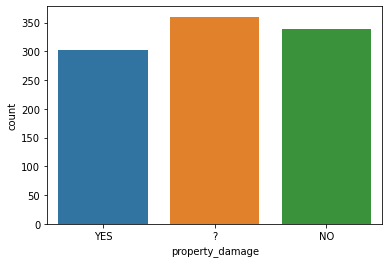

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


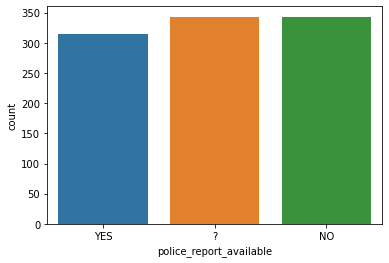

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


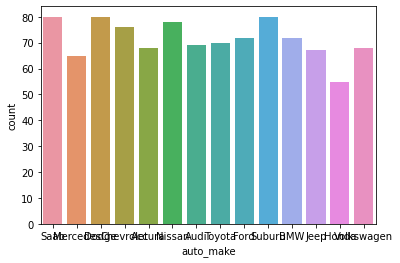

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


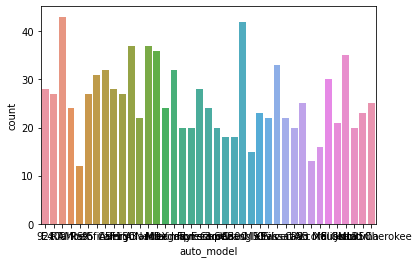

RAM               43
Wrangler          42
Neon              37
A3                37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
Forrestor         28
Camry             28
92x               28
F150              27
95                27
E400              27
Grand Cherokee    25
93                25
Maxima            24
Escape            24
Tahoe             24
X5                23
Ultima            23
Silverado         22
Highlander        22
Civic             22
Fusion            21
Corolla           20
Impreza           20
ML350             20
TL                20
CRV               20
3 Series          18
C300              18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


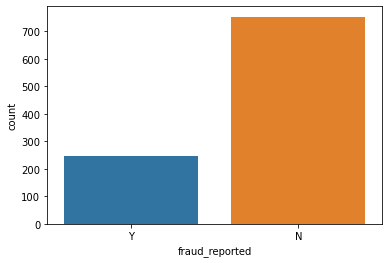

N    753
Y    247
Name: fraud_reported, dtype: int64


In [35]:
for i in df_cat.columns:
    sns.countplot(df_cat[i])
    plt.show()
    print(df_cat[i].value_counts())
    

Some columns have '?' as unique value,so we replace it by 'unknown'

In [36]:
df['collision_type']=df['collision_type'].replace('?','unknown')

In [37]:
df['property_damage']=df['property_damage'].replace('?','unknown')

In [38]:
df['police_repport_avalable']=df['police_report_available'].replace('?','unknown')

Checking relationship of catagorical columns with fraud_reported column

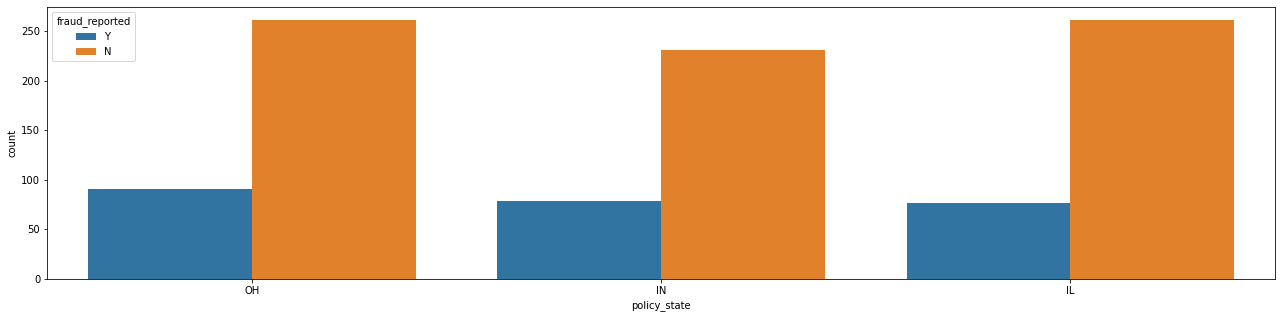

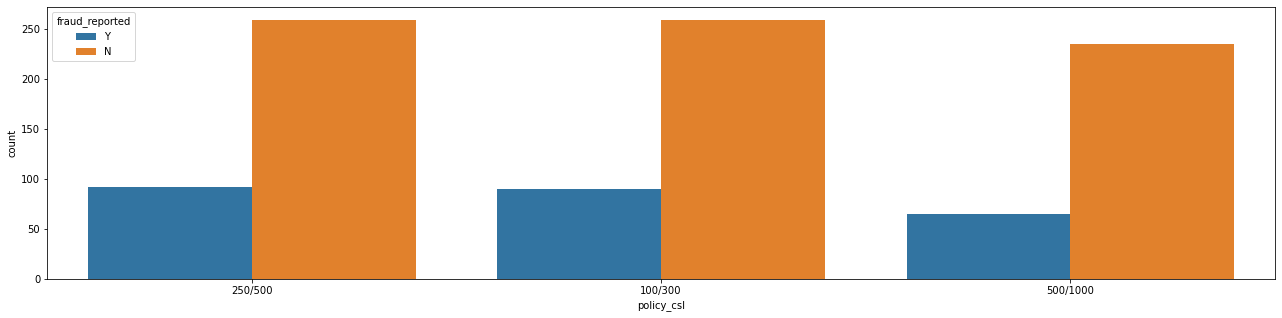

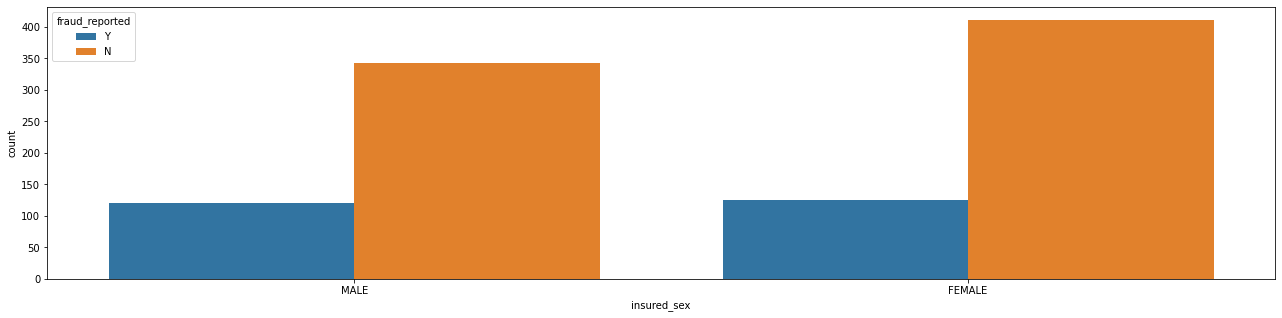

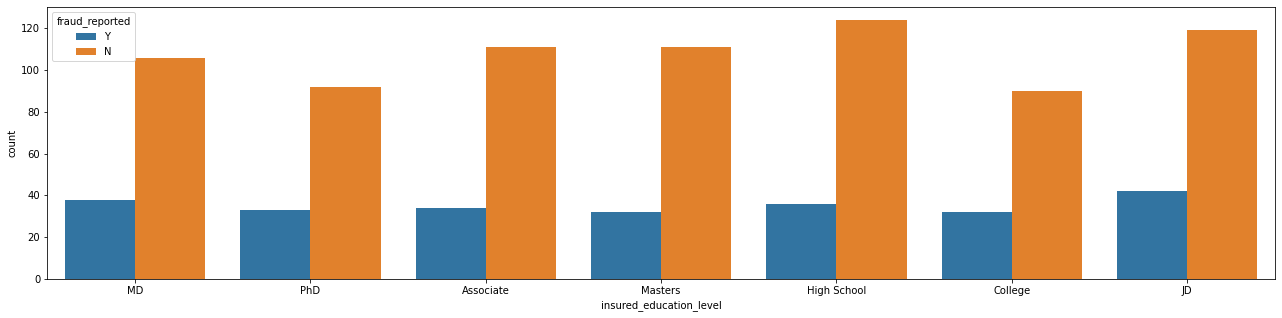

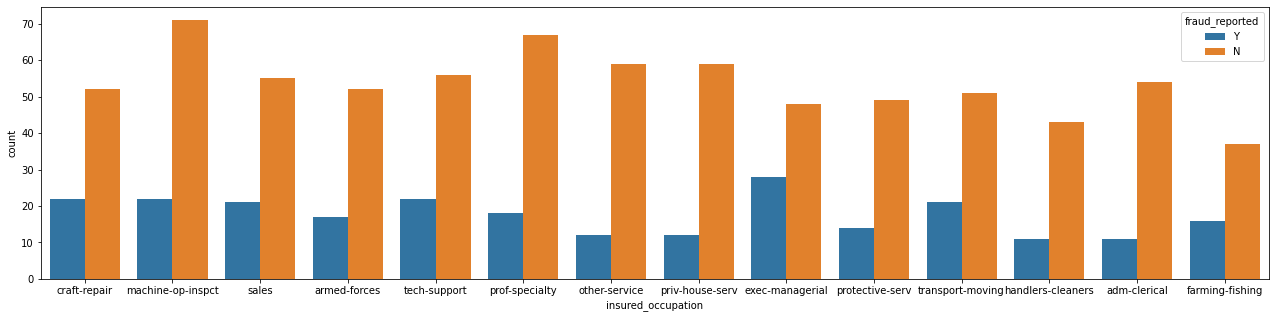

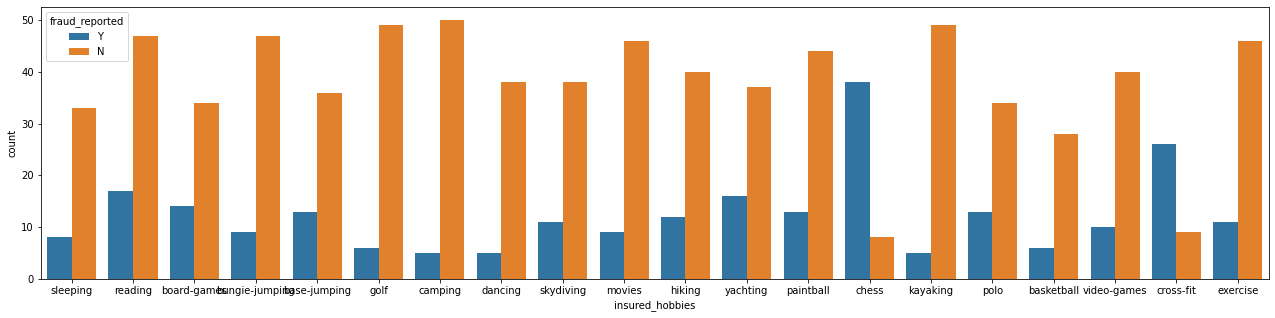

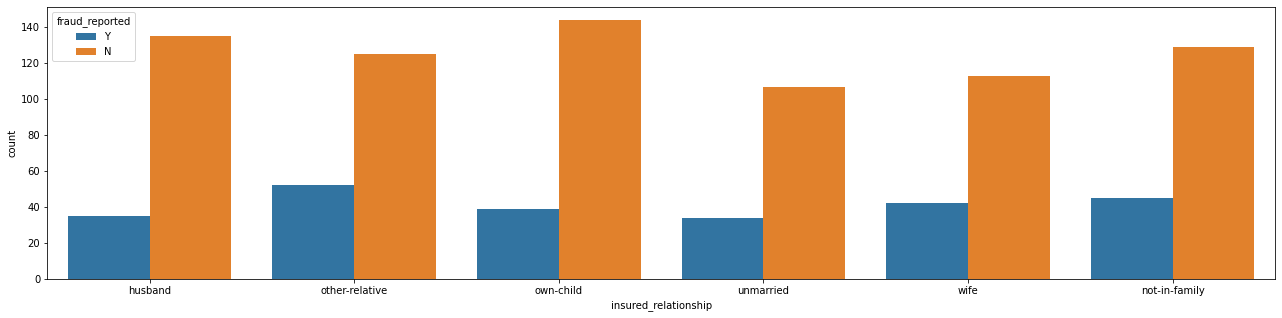

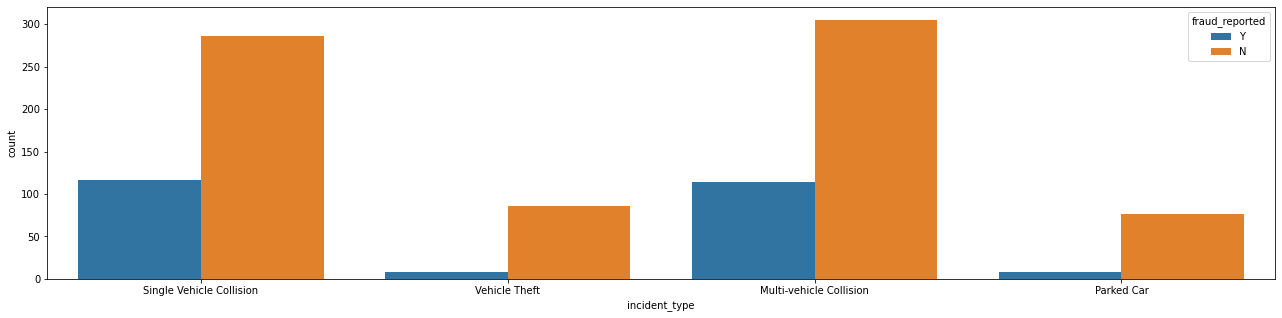

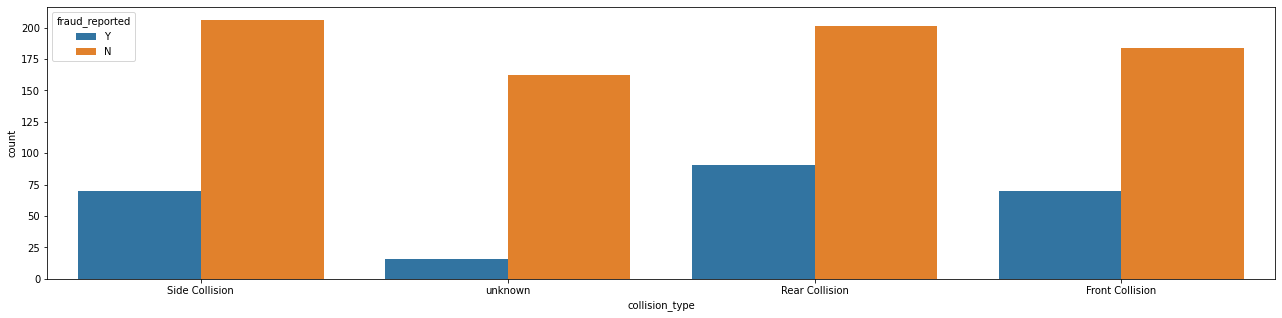

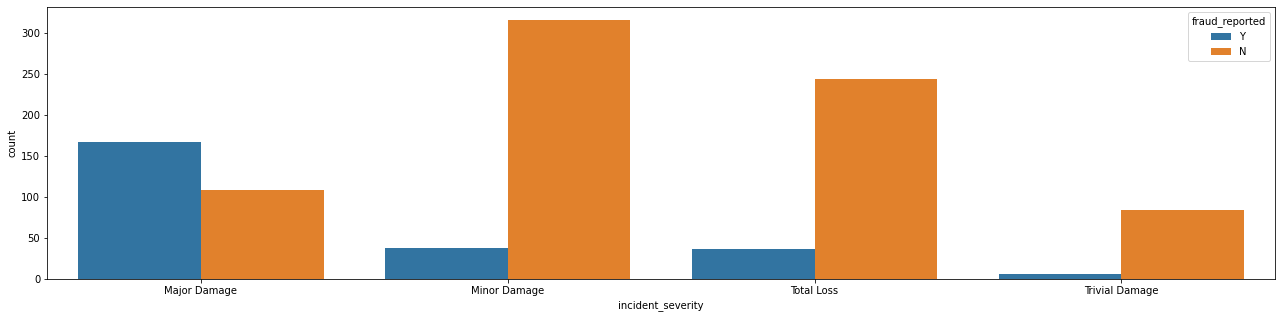

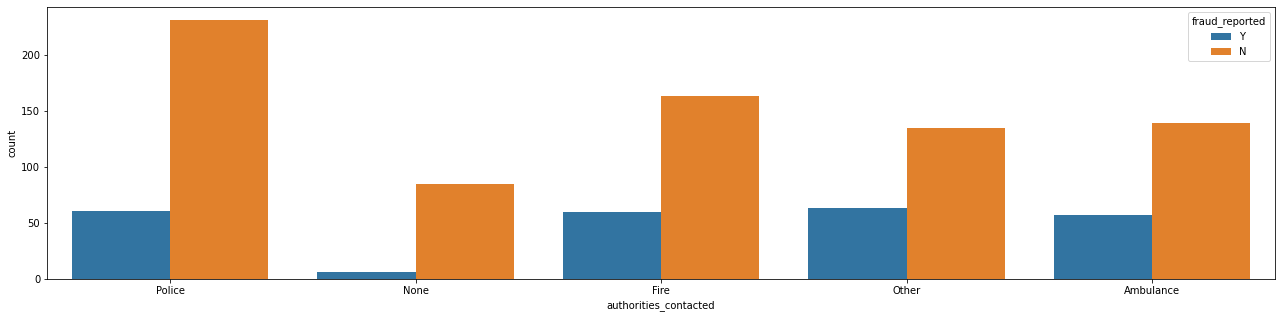

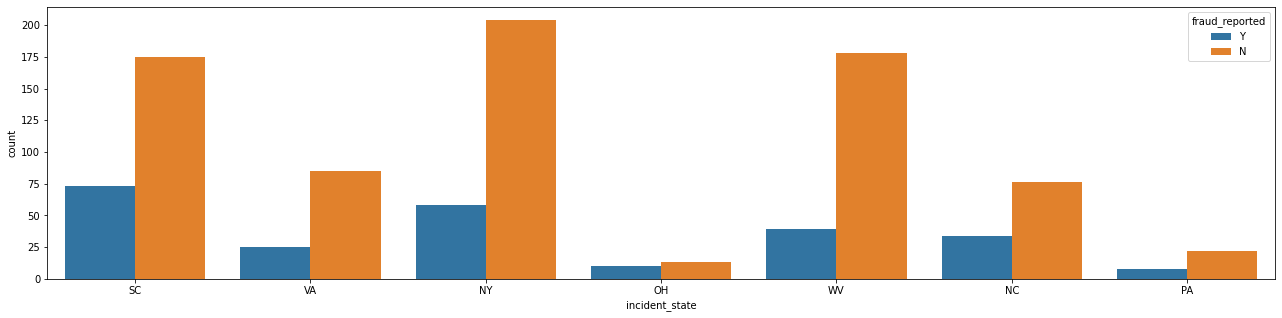

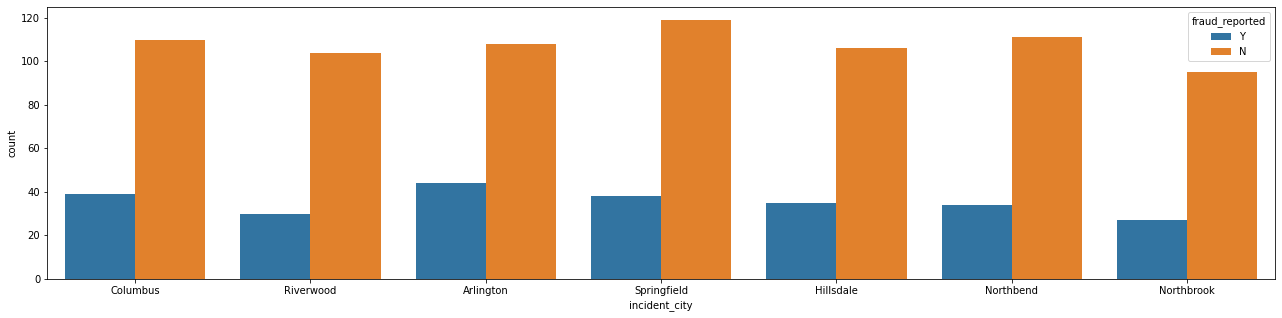

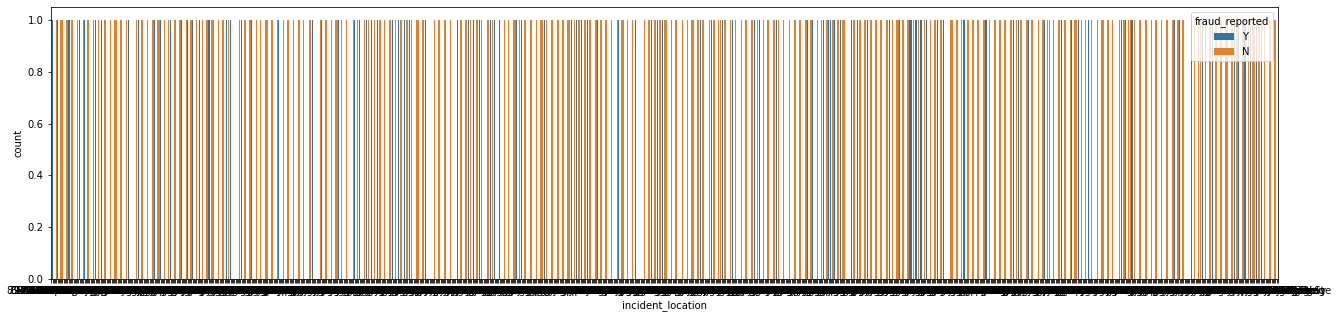

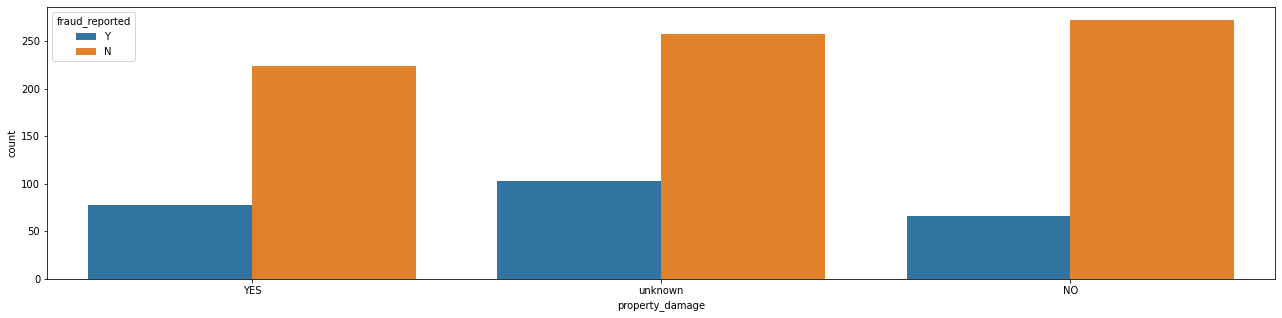

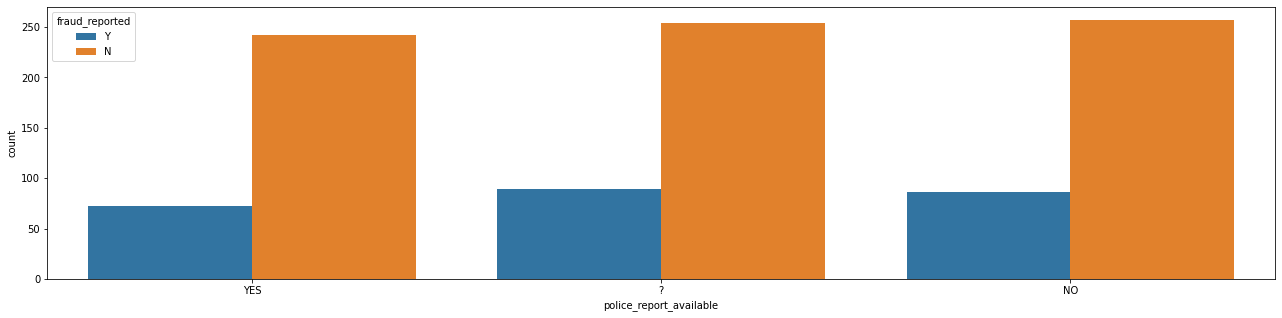

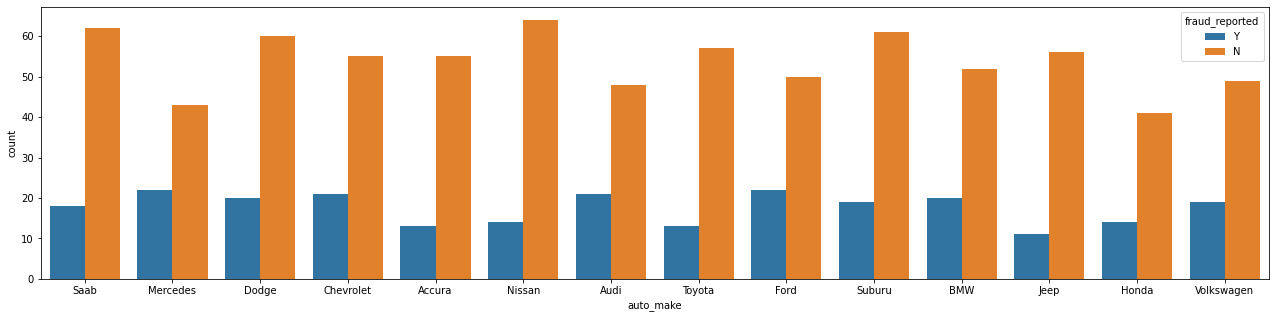

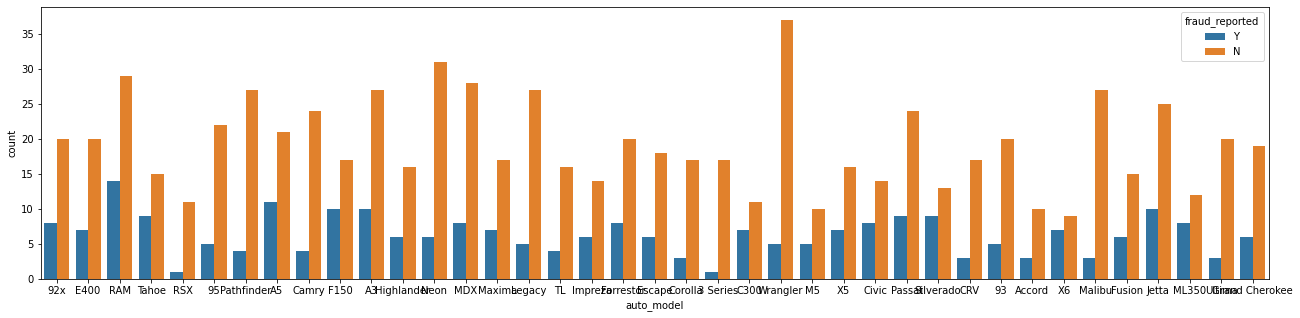

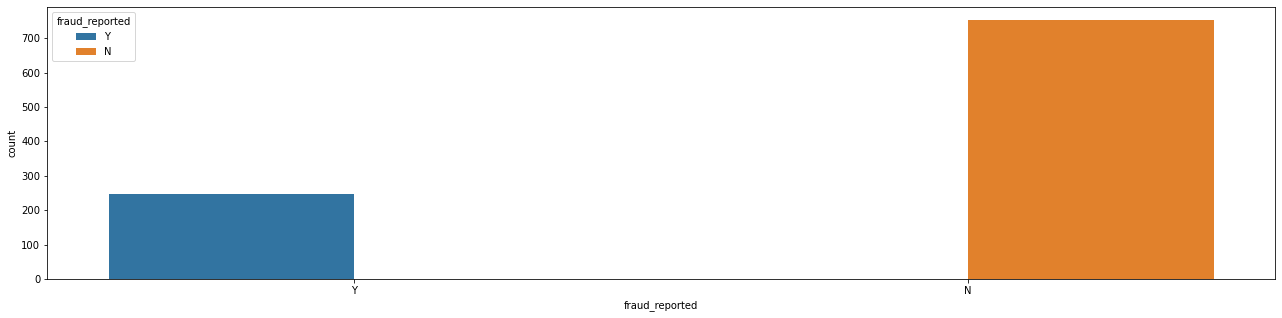

In [39]:
for i in df_cat.columns:
    plt.figure(figsize=(22,5))
    sns.countplot(x=df[i],hue=df['fraud_reported'],data=df_cat)
    plt.show()

Male and Females are doing approxmately equal no. of insurace fraud

people who have completed jd has done more insurance fraud followed by MD and Highschool

Executive_managerial are doing more fraud insurance

Insured people who have hobbies of playing chess are doing more no. of fraud insurance

Incident of vehicle theft and parked car have less fraud insurance case

Most insured people who reported to police has less fraud

In sc state  fraud insurance is high and in PA state fraud insurance is low

Most expensive car(such as Mercedes,Audi,Bmw) have high insurance fraud insurance case



Our target_variable(fraud_reported) is catagorical,so we have to encode it by using LabelEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

We have to make encoding other catagorical columns

In [41]:
from sklearn.preprocessing import OrdinalEncoder
od=OrdinalEncoder()
df['policy_state']=od.fit_transform(df[['policy_state']])
df['policy_csl']=od.fit_transform(df[['policy_csl']])
df['insured_sex']=od.fit_transform(df[['insured_sex']])
df['insured_education_level']=od.fit_transform(df[['insured_education_level']])
df['insured_occupation']=od.fit_transform(df[['insured_occupation']])
df['insured_relationship']=od.fit_transform(df[['insured_relationship']])
df['incident_type']=od.fit_transform(df[['incident_type']])
df['collision_type']=od.fit_transform(df[['collision_type']])
df['incident_severity']=od.fit_transform(df[['incident_severity']])
df['authorities_contacted']=od.fit_transform(df[['authorities_contacted']])
df['incident_state']=od.fit_transform(df[['incident_state']])
df['incident_city']=od.fit_transform(df[['incident_city']])
df['incident_location']=od.fit_transform(df[['incident_location']])
df['property_damage']=od.fit_transform(df[['property_damage']])
df['police_report_available']=od.fit_transform(df[['police_report_available']])
df['auto_make']=od.fit_transform(df[['auto_make']])
df['auto_model']=od.fit_transform(df[['auto_model']])
df['insured_hobbies']=od.fit_transform(df[['insured_hobbies']])
df['police_report_available']=od.fit_transform(df[['police_report_available']])

Then we have to go to numeric columns to check it's distribution,skewness and outlier

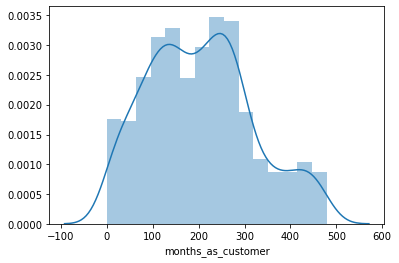

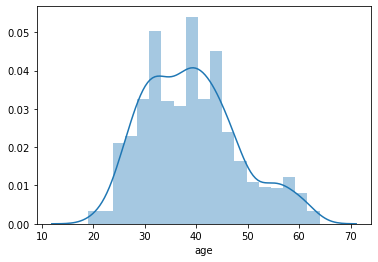

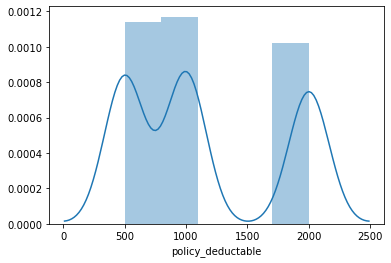

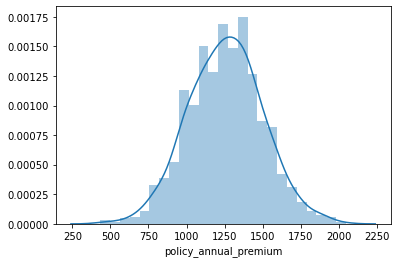

C:\Users\Lenovo\anacon\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


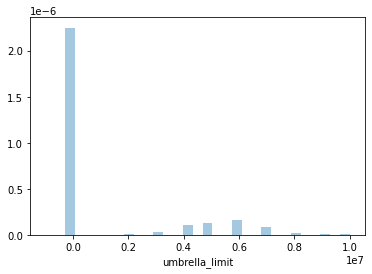

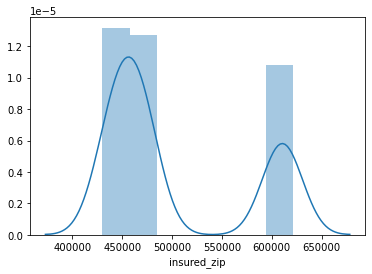

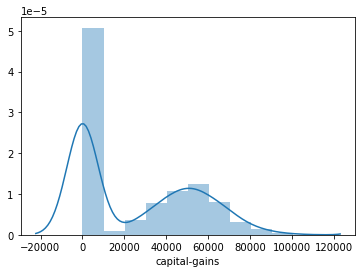

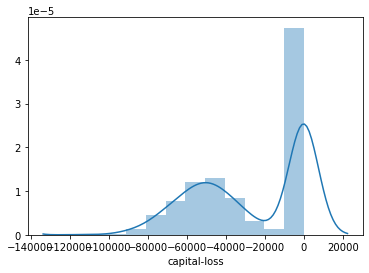

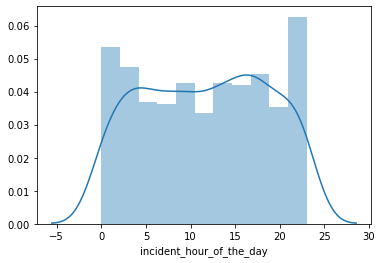

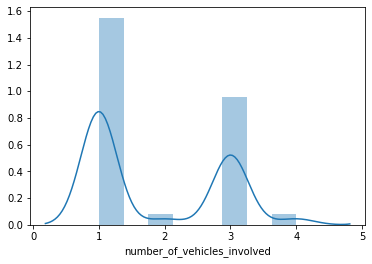

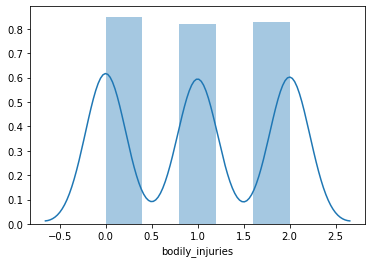

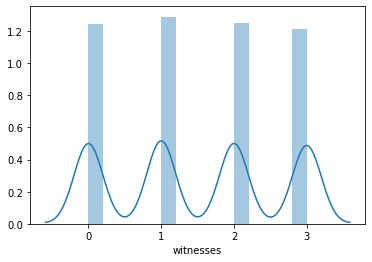

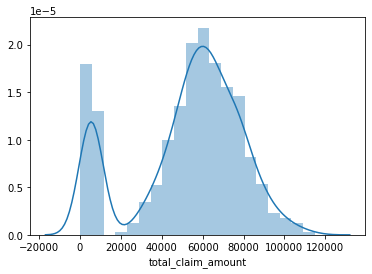

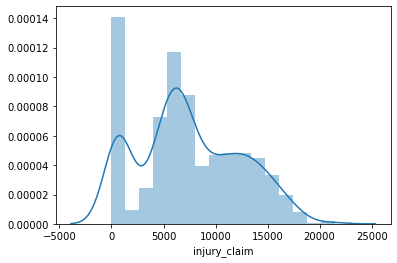

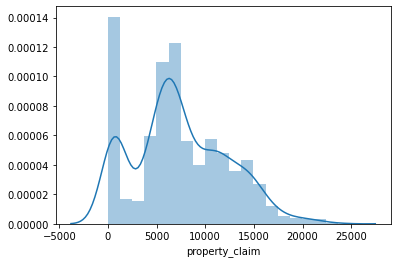

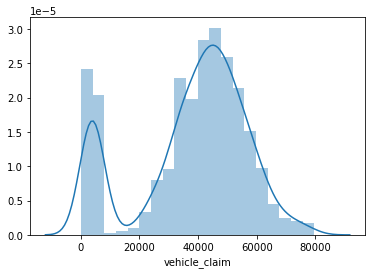

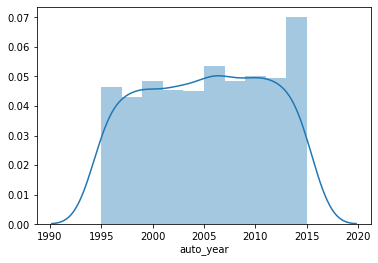

In [42]:
for df_num in df[df_num].columns:
    sns.distplot(df[df_num])
    plt.show()

In [43]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage               -0.041341


Umbrella limit column has some skewness,so we remove it by using power_transform

In [44]:
from sklearn.preprocessing import power_transform
df['umbrella_limit']=power_transform(df[['umbrella_limit']])

In [45]:
df.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,1136.000000,1256.406150,1.071365e-16,501214.488000,0.463000,2.966000,6.653000,9.731000,2.416000,25126.100000,-26793.700000,1.172000,1.378000,1.184000,2.167000,3.242000,2.966000,499.500000,11.644000,1.83900,1.022000,0.992000,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,0.83096,0.804516,611.864673,244.167395,1.000500e+00,71701.610941,0.498879,1.948497,4.019048,5.674049,1.681003,27872.187708,28104.096686,1.081474,1.048912,0.939695,1.532142,2.155942,2.044266,288.819436,6.951373,1.01888,0.835592,0.820127,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,0.00000,0.000000,500.000000,433.330000,-2.052549e+01,430104.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-111100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,0.00000,0.000000,500.000000,1089.607500,-3.491129e-01,448404.500000,0.000000,1.000000,3.000000,5.000000,1.000000,0.000000,-51500.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,249.750000,6.000000,1.00000,0.000000,0.000000,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,1.00000,1.000000,1000.000000,1257.200000,-3.491129e-01,466445.500000,0.000000,3.000000,7.000000,10.000000,2.000000,0.000000,-23250.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,499.500000,12.000000,1.00000,1.000000,1.000000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,2.00000,2.000000,2000.000000,1415.695000,-3.491129e-01,603251.000000,1.000000,5.000000,10.000000,15.000000,4.000000,51025.000000,0.000000,2.000000,2.000000,2.000000,4.000000,5.000000,5.000000,749.250000,17.000000,3.00000,2.000000,2.000000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,2.00000,2.000000,2000.000000,2047.590000,2.727988e+00,620962.000000,1.000000,6.000000,13.000000,19.000000,5.000000,100500.000000,0.000000,3.000000,3.000000,3.000000,4.000000,6.000000,6.000000,999.000000,23.000000,4.00000,2.000000,2.000000,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


# Checking Corelation

In [46]:
df.corr()['fraud_reported']

months_as_customer             0.020544
age                            0.012143
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.014480
umbrella_limit                 0.056130
insured_zip                    0.019368
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_type                 -0.050376
collision_type                -0.135725
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832
incident_hour_of_the_day       0.004316
number_of_vehicles_involved    0.051839
property_damage                0.087639


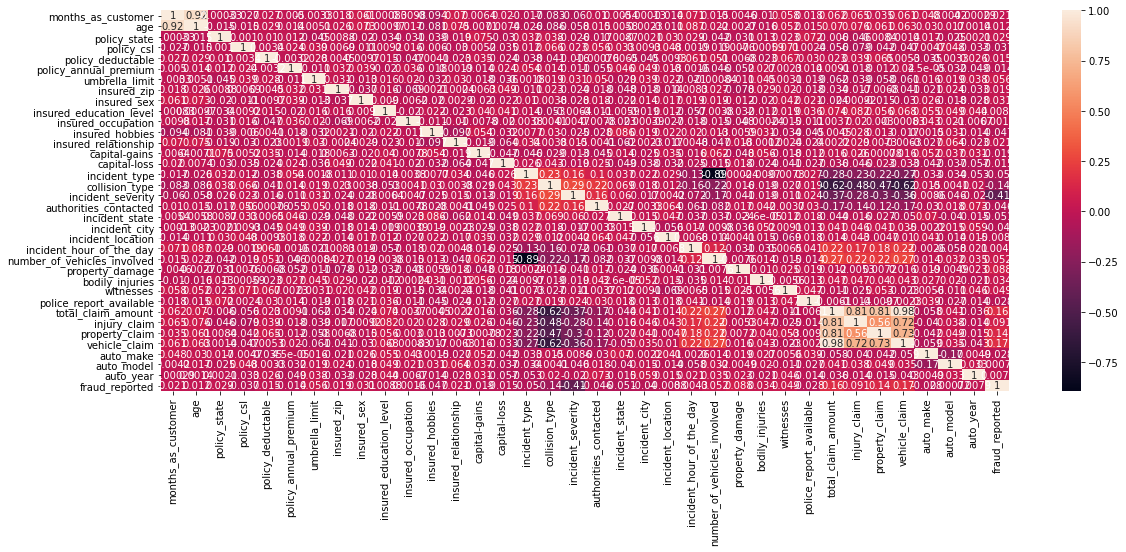

In [47]:
plt.figure(figsize=(19,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

total_claim_amount,,property_claim,vehicle_claim are +vely corelated with fraudinsurance and incident_severity is highly -vely corelated with fraud insurance

We have to drop three year columns as its not necessery

In [48]:
df=df.drop(['policy_bind_date','incident_date','auto_year'],axis=1)
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,police_repport_avalable
0,328,48,2.0,1.0,1000,1406.91,-0.349113,466132,1.0,4.0,2.0,17.0,0.0,53300,0,2.0,2.0,0.0,4.0,4.0,1.0,996.0,5,1,1.0,1,2,2.0,71610,6510,13020,52080,10.0,1.0,1,YES
1,228,42,1.0,1.0,2000,1197.22,1.357817,468176,1.0,4.0,6.0,15.0,2.0,0,0,3.0,3.0,1.0,4.0,5.0,5.0,628.0,8,1,2.0,0,0,0.0,5070,780,780,3510,8.0,12.0,1,unknown
2,134,29,2.0,0.0,2000,1413.14,1.357817,430632,0.0,6.0,11.0,2.0,3.0,35100,0,0.0,1.0,1.0,4.0,1.0,1.0,685.0,7,3,0.0,2,3,1.0,34650,7700,3850,23100,4.0,30.0,0,NO
3,256,41,0.0,1.0,2000,1415.74,1.644005,608117,0.0,6.0,1.0,2.0,4.0,48900,-62400,2.0,0.0,0.0,4.0,2.0,0.0,669.0,5,1,2.0,1,2,1.0,63400,6340,6340,50720,3.0,34.0,1,NO
4,228,44,0.0,2.0,1000,1583.91,1.644005,610706,1.0,0.0,11.0,2.0,4.0,66000,-46000,3.0,3.0,1.0,2.0,1.0,0.0,220.0,20,1,0.0,0,1,1.0,6500,1300,650,4550,0.0,31.0,0,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2.0,2.0,1000,1310.80,-0.349113,431289,0.0,5.0,2.0,13.0,4.0,0,0,2.0,0.0,1.0,1.0,0.0,4.0,561.0,20,1,1.0,0,1,0.0,87200,17440,8720,61040,6.0,6.0,0,unknown
996,285,41,0.0,0.0,1000,1436.79,-0.349113,608177,0.0,6.0,9.0,17.0,5.0,70900,0,2.0,1.0,0.0,1.0,4.0,3.0,227.0,23,1,1.0,2,3,0.0,108480,18080,18080,72320,13.0,28.0,0,unknown
997,130,34,2.0,1.0,500,1383.49,0.756509,442797,0.0,5.0,1.0,3.0,2.0,35100,0,0.0,2.0,1.0,4.0,0.0,0.0,746.0,4,3,2.0,2,3,2.0,67500,7500,7500,52500,11.0,19.0,0,YES
998,458,62,0.0,2.0,2000,1356.92,1.357817,441714,1.0,0.0,5.0,0.0,5.0,0,0,2.0,1.0,0.0,3.0,1.0,0.0,569.0,2,1,2.0,0,1,2.0,46980,5220,5220,36540,1.0,5.0,0,YES


In [49]:
df=df.drop('police_repport_avalable',axis=1)

We have duplicate of police_report_available so one should be dropped

We have to divide dataset in independent and dependent columns

In [50]:
x=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
dt=DecisionTreeClassifier()

Choosing best random_state

In [52]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    dt.fit(x_train,y_train)
    y_pred=dt.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    if acc > maxacc:
        maxacc=acc
        maxrs=i
print("best accuracy is",maxacc,"on random_state",maxrs)

best accuracy is 0.86 on random_state 162


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=162)

In [54]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [55]:
model=[SVC(),DecisionTreeClassifier(),LogisticRegression(),GaussianNB(),KNeighborsClassifier(),XGBClassifier()]

In [56]:
for i in model:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    

SVC()
0.76
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       228
           1       0.00      0.00      0.00        72

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300

[[228   0]
 [ 72   0]]
DecisionTreeClassifier()
0.8
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       228
           1       0.59      0.54      0.57        72

    accuracy                           0.80       300
   macro avg       0.72      0.71      0.72       300
weighted avg       0.79      0.80      0.80       300

[[201  27]
 [ 33  39]]


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels 

LogisticRegression()
0.76
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       228
           1       0.00      0.00      0.00        72

    accuracy                           0.76       300
   macro avg       0.38      0.50      0.43       300
weighted avg       0.58      0.76      0.66       300

[[228   0]
 [ 72   0]]
GaussianNB()
0.6833333333333333
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       228
           1       0.28      0.21      0.24        72

    accuracy                           0.68       300
   macro avg       0.53      0.52      0.52       300
weighted avg       0.65      0.68      0.67       300

[[190  38]
 [ 57  15]]
KNeighborsClassifier()
0.6666666666666666
              precision    recall  f1-score   support

           0       0.75      0.85      0.80       228
           1       0.15      0.08      0.11        72

    accuracy                        

# Using Ensemble Technique

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [58]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.79
              precision    recall  f1-score   support

           0       0.80      0.96      0.87       228
           1       0.66      0.26      0.38        72

    accuracy                           0.79       300
   macro avg       0.73      0.61      0.62       300
weighted avg       0.77      0.79      0.75       300

[[218  10]
 [ 53  19]]


In [59]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
y_pred=ad.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
    

0.8133333333333334
              precision    recall  f1-score   support

           0       0.83      0.95      0.89       228
           1       0.70      0.39      0.50        72

    accuracy                           0.81       300
   macro avg       0.77      0.67      0.69       300
weighted avg       0.80      0.81      0.79       300

[[216  12]
 [ 44  28]]


In [60]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.93      0.89       228
           1       0.70      0.53      0.60        72

    accuracy                           0.83       300
   macro avg       0.78      0.73      0.75       300
weighted avg       0.82      0.83      0.82       300

[[212  16]
 [ 34  38]]


finding best cv and cv scores of models

In [61]:
from sklearn.model_selection import cross_val_score

In [62]:
for i in range(2,10):
    cvscore=cross_val_score(gb,x,y,cv=i)
    print('accuracy score is',cvscore.mean(),'for cv =',i)

accuracy score is 0.822 for cv = 2
accuracy score is 0.8260206314098529 for cv = 3
accuracy score is 0.826 for cv = 4
accuracy score is 0.826 for cv = 5
accuracy score is 0.8260647379938918 for cv = 6
accuracy score is 0.836009061361174 for cv = 7
accuracy score is 0.8160000000000001 for cv = 8
accuracy score is 0.830026455026455 for cv = 9


Our best cv=7

In [63]:
svc=SVC()
dt=DecisionTreeClassifier()
gn=GaussianNB()
knn=KNeighborsClassifier()
ex=XGBClassifier()
rf=RandomForestClassifier()
ad=AdaBoostClassifier()
gd=GradientBoostingClassifier()
lg=LogisticRegression()

In [64]:
model=[svc,dt,gn,knn,ex,rf,ad,gd,lg]

In [65]:
for i in model:
    cvscore=cross_val_score(i,x,y,cv=7)
    print('accuracy score of',i,'is',cvscore.mean())

accuracy score of SVC() is 0.7530005206061542
accuracy score of DecisionTreeClassifier() is 0.7799594771425757
accuracy score of GaussianNB() is 0.627984691364973
accuracy score of KNeighborsClassifier() is 0.6990052201319806
[08:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Lenovo\anacon\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[08:50:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:50:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

accuracy score of LogisticRegression() is 0.7530005206061542


C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = 

GradientBoostingClassifier is best algorithm for model.We will be confirmed it by cross checking roc_auc_score

# Roc_Curve

In [72]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

C:\Users\Lenovo\anacon\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5633528265107212


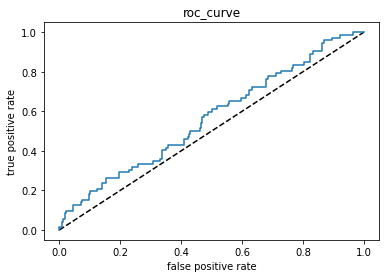

In [73]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
print(roc_auc_score(y_test,y_pred_prob))
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('roc_curve')
plt.show()

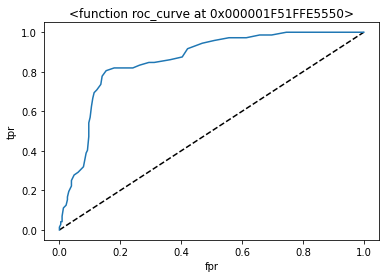

0.8574256822612086


In [74]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(roc_curve)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

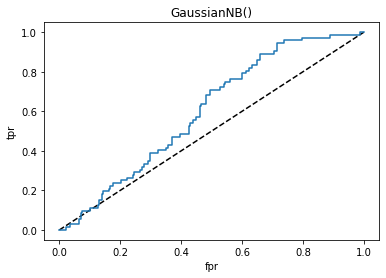

0.6011208576998051


In [76]:
gn=GaussianNB()
gn.fit(x_train,y_train)
y_pred_prob=gn.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gn)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

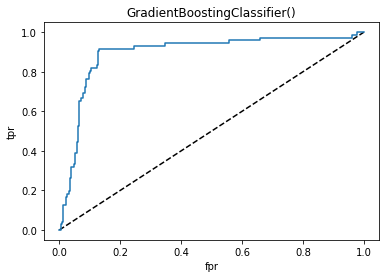

0.8931530214424951


In [77]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
y_pred_prob=gb.predict_proba(x_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title(gb)
plt.show()
print(roc_auc_score(y_test,y_pred_prob))

Roc-Auc score of GradientBoostingClassifier is high compare to all models.
f1 score and accuracy_score is good and high of GradientBoostingClassifier from other models.

so we choose GradientBoostingClassifier is the best model for the datasetand We have to hypertuning it.

# Hyperparameter Tuning of Model

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
param={'n_estimators':range(20,81,10)}

In [80]:
gscv=GridSearchCV(gb,param,cv=7)
gscv.fit(x_train,y_train)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(),
             param_grid={'n_estimators': range(20, 81, 10)})

In [81]:
gscv.best_estimator_

GradientBoostingClassifier(n_estimators=30)

In [82]:
gscv.best_params_

{'n_estimators': 30}

In [84]:
gb1=GradientBoostingClassifier(n_estimators=20)
gb1.fit(x_train,y_train)
y_pred=gb1.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8633333333333333
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       228
           1       0.74      0.67      0.70        72

    accuracy                           0.86       300
   macro avg       0.82      0.80      0.81       300
weighted avg       0.86      0.86      0.86       300

[[211  17]
 [ 24  48]]


After hyperparametertuning my accuracy score becomes 86.33% from 83.33%.

# Saving Model

In [85]:
import joblib
joblib.dump(gb,'fraudinsurance.obj')

['fraudinsurance.obj']